In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **GRU Exercise**

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Week5/Datasets/traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


## Data Exploration



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Junction,48120.0,2.180549e+00,9.669554e-01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
Vehicles,48120.0,2.279133e+01,2.075006e+01,1.000000e+00,9.000000e+00,1.500000e+01,2.900000e+01,1.800000e+02
ID,48120.0,2.016330e+10,5.944854e+06,2.015110e+10,2.016042e+10,2.016093e+10,2.017023e+10,2.017063e+10


## Feature Engineering (if needed)



In [6]:
# Feature Engineering
# df['DateTime'] = pd.to_datetime(df['DateTime'])
# df.set_index('DateTime', inplace=True)

## Exploratory Data Analysis


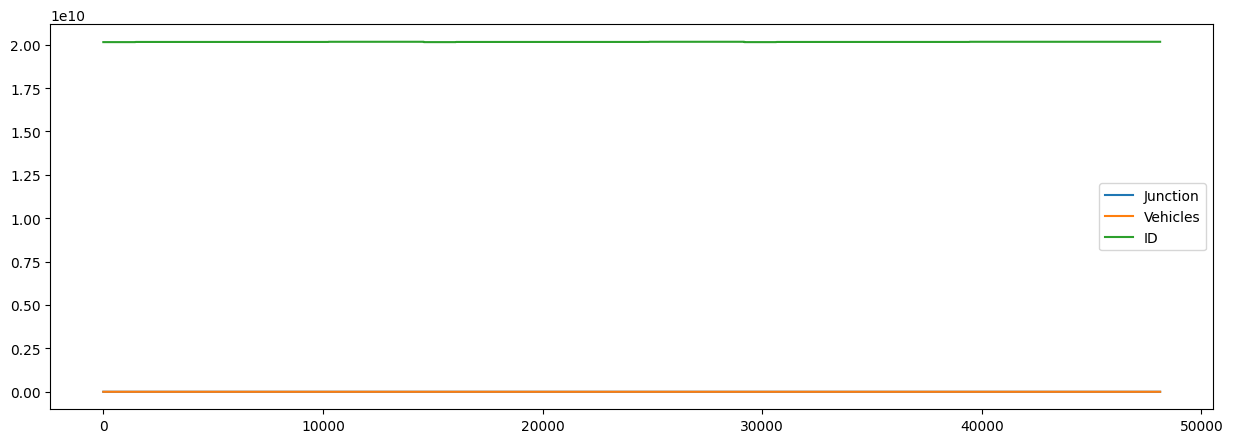

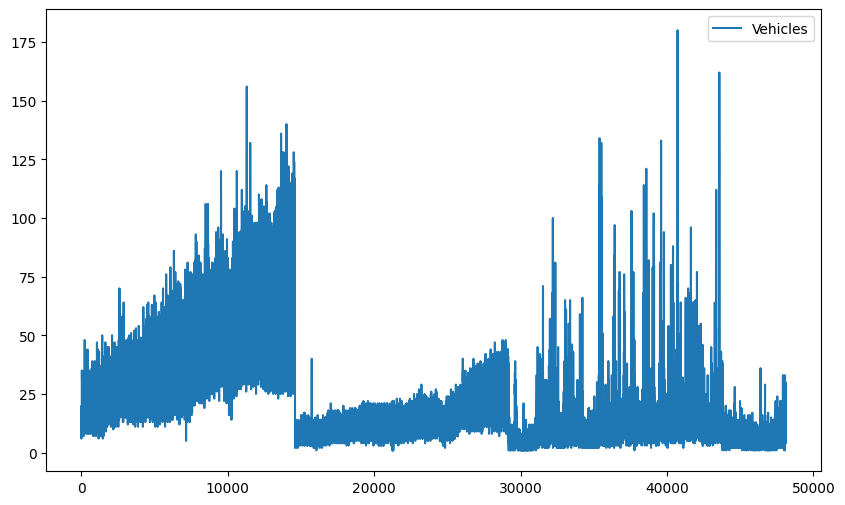

In [7]:
# Exploratory Data Analysis
df.plot(figsize=(15, 5))
plt.show()


df.plot(y='Vehicles', figsize=(10,6))
plt.show()

## split into train and test sets

In [8]:
# We will use the 'Close' column as our target variable
df = df[['Vehicles']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Create sequences for the GRU model
def create_sequences(df, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(df)):
        X.append(df[i-seq_length:i, 0])
        y.append(df[i, 0])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 60  # Using 60 days of data to predict the next day

# Create the sequences
X, y = create_sequences(scaled_data, seq_length)

# Reshape the data for the GRU model
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


## Model Building



In [9]:
# Build the GRU model
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Fitting The Model



In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 108s 86ms/step - loss: 0.0023 - val_loss: 9.3357e-04
Epoch 2/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 115s 96ms/step - loss: 7.1699e-04 - val_loss: 9.1020e-04
Epoch 3/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 146s 99ms/step - loss: 6.7608e-04 - val_loss: 8.3726e-04
Epoch 4/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 133s 91ms/step - loss: 6.4164e-04 - val_loss: 7.7163e-04
Epoch 5/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 105s 87ms/step - loss: 6.3135e-04 - val_loss: 7.6880e-04
Epoch 6/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 138s 84ms/step - loss: 5.7668e-04 - val_loss: 7.4722e-04
Epoch 7/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 142s 84ms/step - loss: 5.2091e-04 - val_loss: 8.1612e-04
Epoch 8/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 144s 85ms/step - loss: 5.5063e-04 - val_loss: 8.1235e-04
Epoch 9/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 142s 85ms/step - loss: 5.3821e-04 - val_loss: 7.5776e-04
Epoch 10/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 139s 83ms/step - loss: 5.1768e-04 - val_loss: 7.6011e-04


## Make preductuion and evaluatuin matrix.

In [11]:
# Make predictions
predicted_stock_price = model.predict(X_test)

# Inverse transform to get actual stock prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

301/301 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0012
Test Loss: 0.0007601089891977608


## Visualize the result

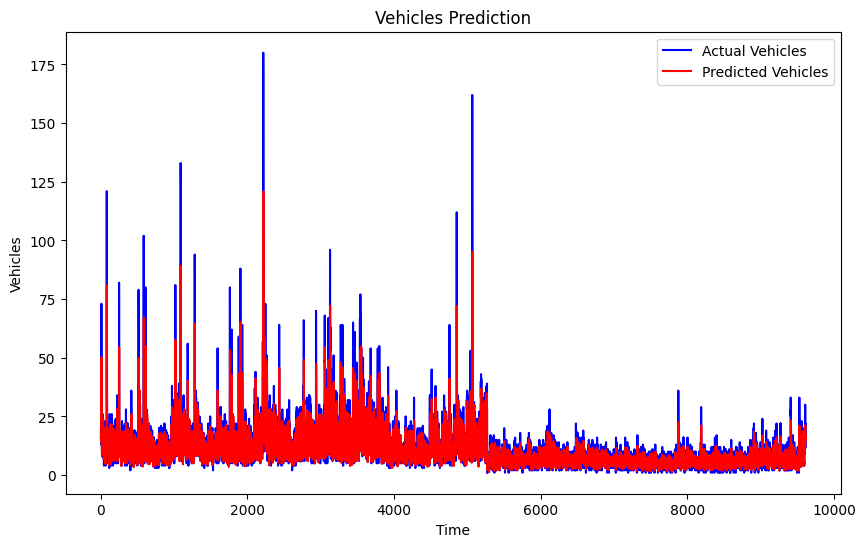

In [13]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Vehicles')
plt.plot(predicted_stock_price, color='red', label='Predicted Vehicles')
plt.title(f'Vehicles Prediction')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

# **Well done** :)